In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/My Drive/CASE Studies/CASE1/dataset.csv")
df

,Price,Airline,Cabin,Dept_city,Dept_date,Dept_month,arrival_city,stops,layover_cities,Departure_Date,Arrival_Date,duration,weekday,day_name,dept_hours,arrival_hours,Dept_flights_time,arrival_flights_time
0,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 09:30,20-04-2021 11:40,130.0,1,Tuesday,9,11,Morning_flight,Afternoon_flight
1,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 15:30,20-04-2021 17:40,130.0,1,Tuesday,15,17,Afternoon_flight,Evening_flight
2,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 16:55,20-04-2021 19:05,130.0,1,Tuesday,16,19,Evening_flight,Evening_flight
3,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 12:45,20-04-2021 15:00,135.0,1,Tuesday,12,15,Afternoon_flight,Afternoon_flight
4,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 17:45,20-04-2021 20:05,140.0,1,Tuesday,17,20,Evening_flight,Evening_flight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315980,9114,Vistara,PE,Raipur,16,May,Srinagar,1,New Delhi,2021-05-16 08:55:00,2021-05-16 13:10:00,255.0,6,Sunday,8,13,Morning_flight,Afternoon_flight
315981,9674,Vistara,PE,Raipur,16,May,Ranchi,1,New Delhi,2021-05-16 08:55:00,2021-05-16 19:40:00,645.0,6,Sunday,8,19,Morning_flight,Evening_flight
315982,9674,Vistara,PE,Raipur,16,May,Ranchi,1,New Delhi,2021-05-16 20:20:00,2021-05-16 08:20:00,720.0,6,Sunday,20,8,Evening_flight,Morning_flight
315983,14602,Vistara,PE,Raipur,16,May,Port Blair,2,"New Delhi,Kolkata",2021-05-16 20:20:00,2021-05-16 11:20:00,900.0,6,Sunday,20,11,Evening_flight,Afternoon_flight


In [ ]:
df["optimal_time"]=df["dept_hours"]-4

In [ ]:
for i in range(df.shape[0]):
  if df["optimal_time"].iloc[i]<0:
    df["optimal_time"].iloc[i] +=24

df["optimal_time"].describe()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


count    315985.000000
mean          8.914271
std           5.148739
min           0.000000
25%           4.000000
50%           8.000000
75%          13.000000
max          23.000000
Name: optimal_time, dtype: float64

In [ ]:
df.drop(columns=["Dept_city","arrival_city","layover_cities","Departure_Date","Arrival_Date","day_name","arrival_hours","arrival_flights_time"],inplace=True,axis=1)

<font color='BLUE'> **AIRLINE VS PRICE**</font>
 


In [ ]:
ind=[]
for i in range(df.shape[0]):
  if "," in df["Airline"].iloc[i]:
    ind.append(i)
df.drop(ind,inplace=True,axis=0)

In [ ]:
air=df["Airline"].value_counts().sort_values(ascending=False)
air
l1 = []
l1.append(df[df["Airline"] == "flybig"].index)
l1.append(df[df["Airline"] == "TruJet"].index)
l1.append(df[df["Airline"] == "Air India Express"].index)
#print(l1)
l2 = []
for i in l1:
    for j in i:
        l2.append(j)
df.drop(l2,inplace=True,axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288090 entries, 0 to 315984
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price              288090 non-null  int64  
 1   Airline            288090 non-null  object 
 2   Cabin              288090 non-null  object 
 3   Dept_date          288090 non-null  int64  
 4   Dept_month         288090 non-null  object 
 5   stops              288090 non-null  int64  
 6   duration           288090 non-null  float64
 7   weekday            288090 non-null  int64  
 8   dept_hours         288090 non-null  int64  
 9   Dept_flights_time  288090 non-null  object 
 10  optimal_time       288090 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 26.4+ MB


In [ ]:
x=["Airline","Cabin","Dept_month","Dept_flights_time"]
from sklearn.preprocessing import LabelEncoder
for i in x:
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[[i]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.to_csv("processed_dataset.csv")

In [ ]:
df

,Price,Airline,Cabin,Dept_date,Dept_month,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_time
0,6159,5,2,20,0,0,130.0,1,9,2,5
1,6159,5,2,20,0,0,130.0,1,15,0,11
2,6159,5,2,20,0,0,130.0,1,16,1,12
3,6159,5,2,20,0,0,135.0,1,12,0,8
4,6159,5,2,20,0,0,140.0,1,17,1,13
...,...,...,...,...,...,...,...,...,...,...,...
315980,9114,5,2,16,1,1,255.0,6,8,2,4
315981,9674,5,2,16,1,1,645.0,6,8,2,4
315982,9674,5,2,16,1,1,720.0,6,20,1,16
315983,14602,5,2,16,1,2,900.0,6,20,1,16


In [ ]:
df["Cabin"].value_counts()

1    164839
0    106382
2     16869
Name: Cabin, dtype: int64

In [ ]:
import xgboost as xg
x=df.drop(["Price"],axis=1)
y=df["Price"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_tr,x_cv,y_tr,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)
xgb_r.fit(x_tr, y_tr)  

[13:57:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error as MSE
pred = xgb_r.predict(x_cv)
rmse = np.sqrt(MSE(y_cv, pred))
r2= r2_score(y_cv, pred)
print("RMSE : % f" %(rmse))
print("R2 : % f" %(r2))

RMSE :  5937.518955
R2 :  0.910511


In [ ]:
pred = xgb_r.predict(x_test)
rmse = np.sqrt(MSE(y_test, pred))
r2= r2_score(y_test, pred)
print("RMSE : % f" %(rmse))
print("R2 : % f" %(r2))

RMSE :  5945.296078
R2 :  0.911422


In [ ]:
xgb_r.feature_importances_

array([9.6938707e-02, 6.8950284e-01, 7.0379488e-03, 2.5072705e-03,
       1.6715340e-01, 3.0838618e-02, 8.1475428e-04, 2.3245725e-03,
       5.2147405e-04, 2.3603006e-03], dtype=float32)

<BarContainer object of 10 artists>

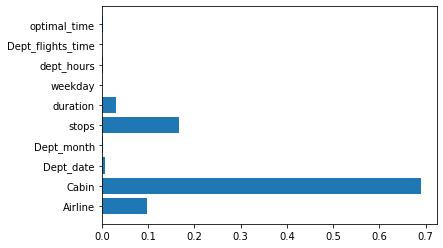

In [ ]:
plt.barh(x_train.columns, xgb_r.feature_importances_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators=100 )
rfg.fit(x_tr,y_tr)
pred = rfg.predict(x_cv)
rmse = np.sqrt(MSE(y_cv, pred))
r2= r2_score(y_cv, pred)
print("RMSE : % f" %(rmse))
print("R2 : % f" %(r2))

RMSE :  4632.025635
R2 :  0.945537


In [ ]:
pred = rfg.predict(x_test)
rmse = np.sqrt(MSE(y_test, pred))
r2= r2_score(y_test, pred)
print("RMSE : % f" %(rmse))
print("R2 : % f" %(r2))

RMSE :  4609.140718
R2 :  0.946762


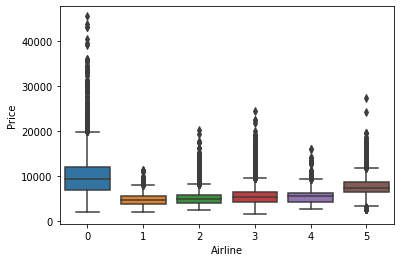

In [ ]:
d=df.groupby("Cabin")
dd=d.get_group(1)
sns.boxplot(data=dd,x="Airline",y="Price")

In [ ]:
stop_data

,Price,Airline,Cabin,Dept_date,Dept_month,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_time
7,5594,4,2,20,0,1,260.0,1,11,0,7
18,10691,4,2,20,0,1,665.0,1,20,1,16
24,10363,4,2,20,0,1,305.0,1,16,1,12
31,9942,4,2,20,0,1,295.0,1,9,2,5
34,10363,4,2,20,0,1,735.0,1,21,3,17
...,...,...,...,...,...,...,...,...,...,...,...
315978,10458,5,2,16,1,1,660.0,6,8,2,4
315979,10458,5,2,16,1,1,765.0,6,20,1,16
315980,9114,5,2,16,1,1,255.0,6,8,2,4
315981,9674,5,2,16,1,1,645.0,6,8,2,4


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [5]:
df=pd.read_csv("G:\\kittu_data\\final.csv")

In [6]:
df.head()

,Price,Airline,Cabin,Dept_city,Dept_date,Dept_month,arrival_city,stops,layover_cities,Departure_Date,Arrival_Date,duration,weekday,day_name,dept_hours,arrival_hours,Dept_flights_time,arrival_flights_time
0,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 09:30,20-04-2021 11:40,130.0,1,Tuesday,9,11,Morning_flight,Afternoon_flight
1,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 15:30,20-04-2021 17:40,130.0,1,Tuesday,15,17,Afternoon_flight,Evening_flight
2,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 16:55,20-04-2021 19:05,130.0,1,Tuesday,16,19,Evening_flight,Evening_flight
3,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 12:45,20-04-2021 15:00,135.0,1,Tuesday,12,15,Afternoon_flight,Afternoon_flight
4,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 17:45,20-04-2021 20:05,140.0,1,Tuesday,17,20,Evening_flight,Evening_flight


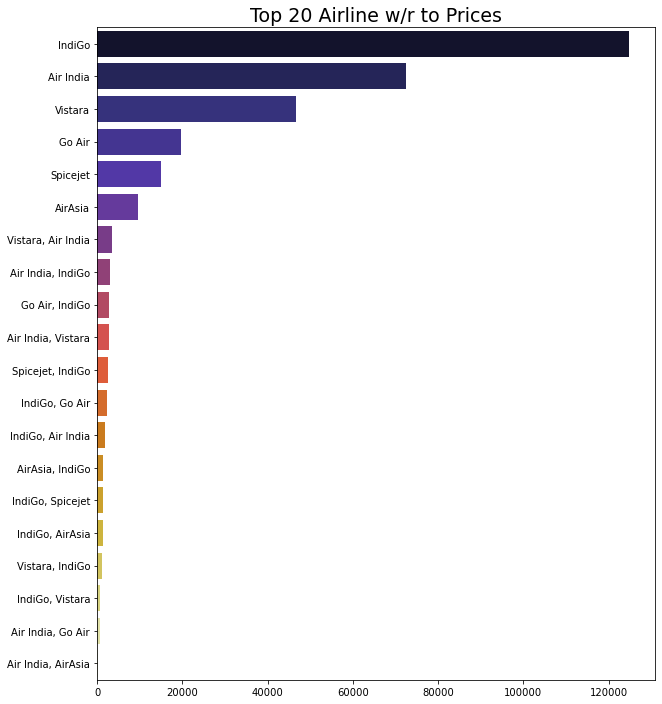

In [7]:
top_20=df["Airline"].value_counts()[:20]
plt.figure(figsize=(10,12))
gv=sns.barplot(y=top_20.index,x=top_20.values,data=df,palette="CMRmap")
plt.title("Top 20 Airline w/r to Prices",fontsize=19)
plt.show()

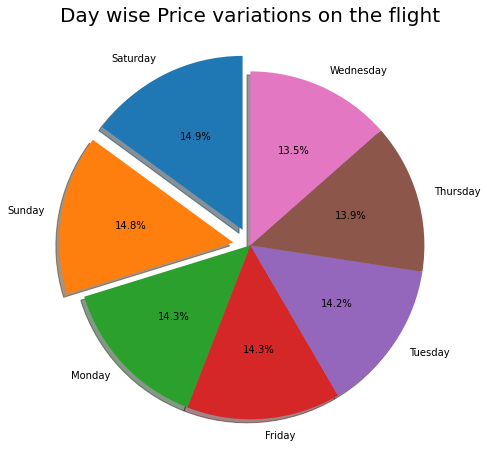

In [11]:
day_wis=df.groupby("day_name")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.pie(day_wis.values,labels=day_wis.index,shadow=True,startangle=90,autopct="%1.1f%%",explode=[0.1,0.1,0,0,0,0,0])
plt.title("Day wise Price variations on the flight",fontsize=20)
plt.show()

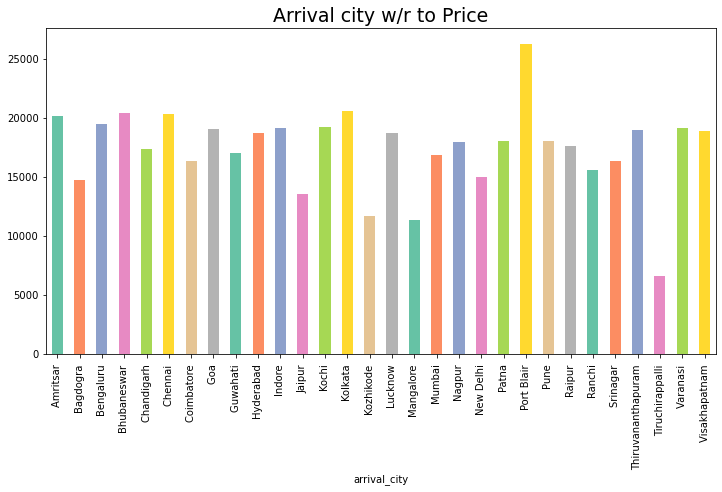

In [15]:
#Get the which arrival city highest and lowest flight price
arr=df.groupby("arrival_city")["Price"].mean()
arr.plot.bar(color=sns.color_palette("Set2",8),figsize=(12,6))
plt.title("Arrival city w/r to Price",fontsize=19)
plt.show()

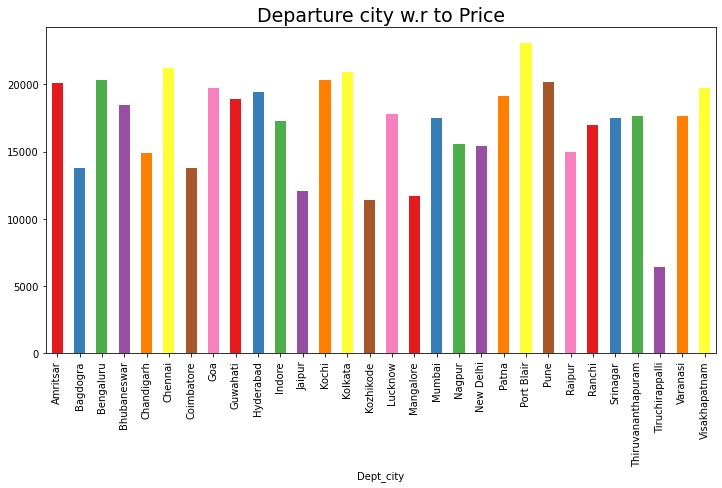

In [16]:
#Get the which dept city has highest flight price
arr1=df.groupby("Dept_city")["Price"].mean()
arr1.plot.bar(color=sns.color_palette("Set1",8),figsize=(12,6))
plt.title("Departure city w.r to Price",fontsize=19)
plt.show()

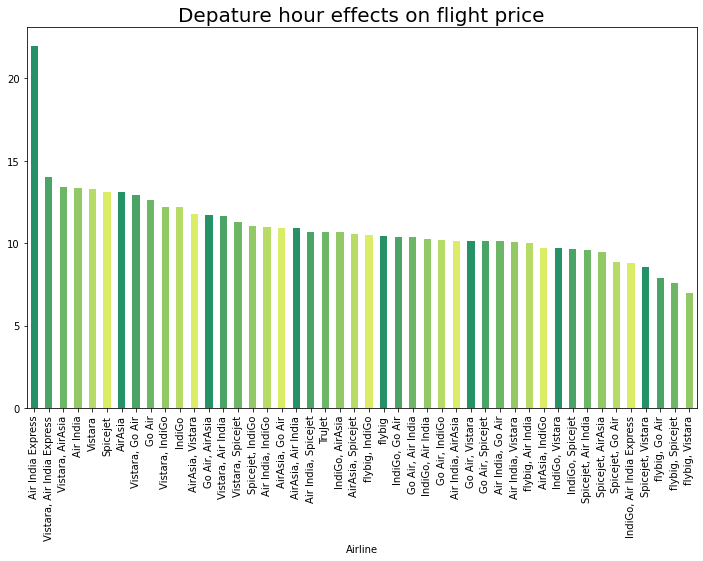

In [17]:
#Check the How many hours if a flight take to departure will affect on a price
debt=df.groupby("Airline")["dept_hours"].mean().sort_values(ascending=False)
debt.plot.bar(color=sns.color_palette("summer"),figsize=(12,7))
plt.title("Depature hour effects on flight price",fontsize=20)
plt.show()

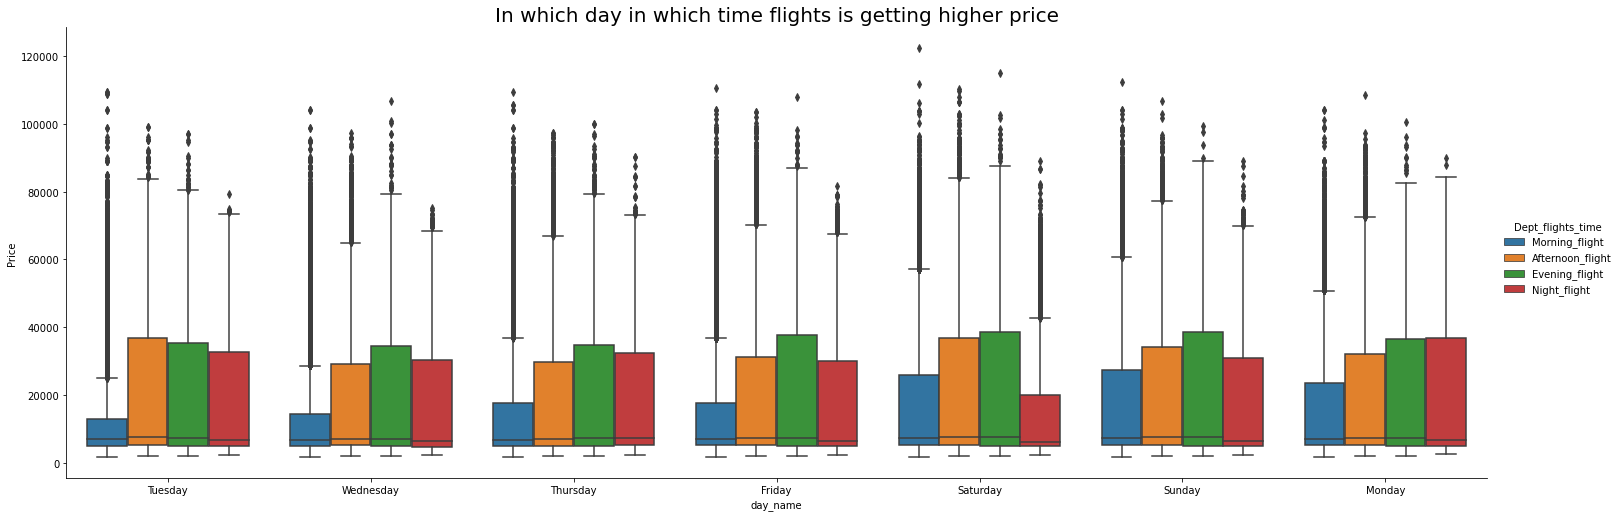

In [18]:
#Check In which day in which flight is getting higher price
sns.catplot(x='day_name',y='Price',hue='Dept_flights_time',kind='box',data=df,height=7,aspect=3)
plt.title("In which day in which time flights is getting higher price",fontsize=20)
plt.show()

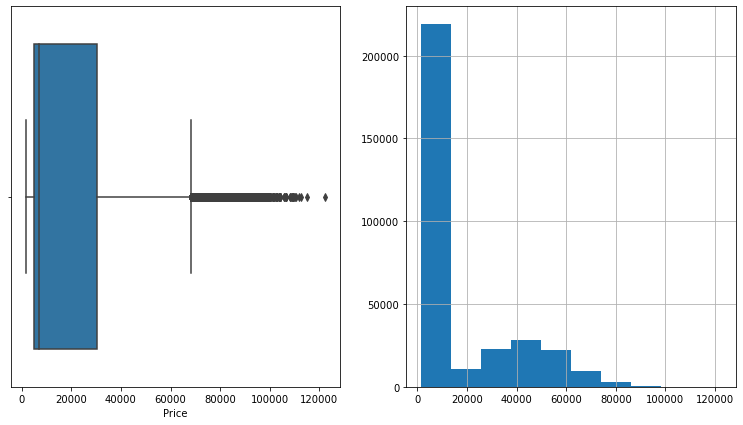

In [19]:
#Check the distribution of the Price column
fig,ax=plt.subplots(1,2,figsize=(13,7))
df["Price"].hist(ax=ax[1])
sns.boxplot(x=df['Price'],ax=ax[0])

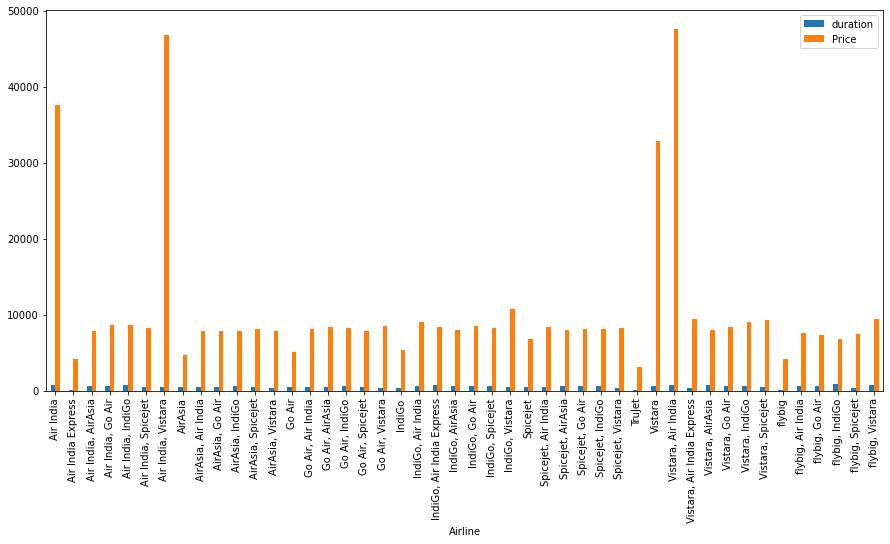

In [20]:
#Whcih airline takes high duration with respect to the price
ddr=df.groupby("Airline")[["duration","Price"]].mean()
ddr.plot.bar(figsize=(15,7))

Text(0.5, 1.0, 'Correlation Matrix')

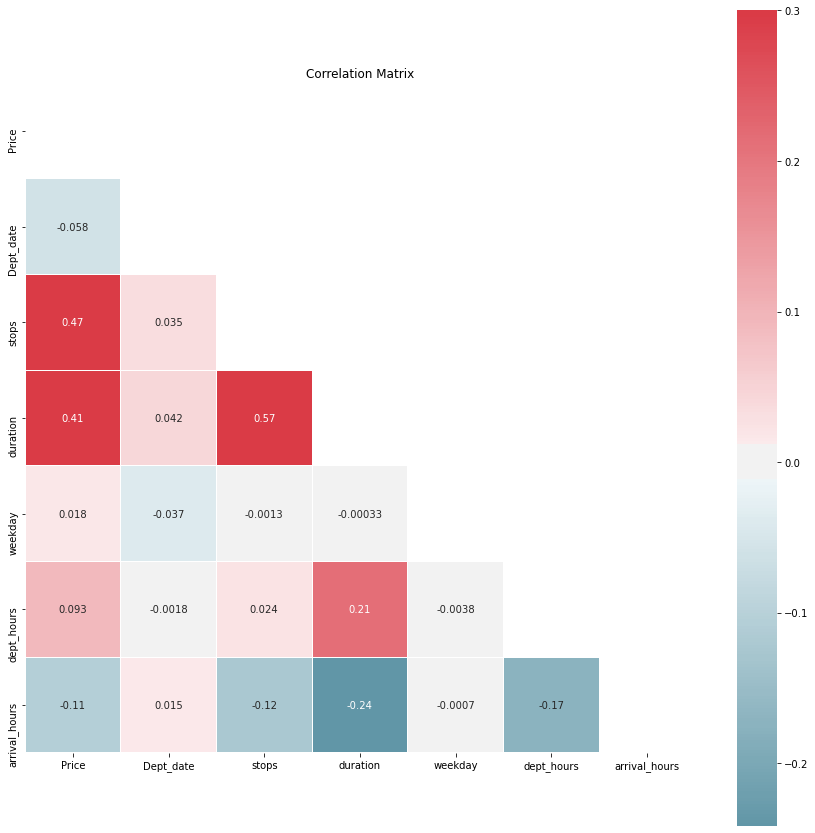

In [21]:
#Finding and plotting the correlation matrix for top20 features

cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(15,15))

corr=df.corr()

#Genrate a mask triangle for a upper traingle
mask=np.triu(np.ones_like(corr,dtype=np.bool))

g=sns.heatmap(corr,annot=True,mask=mask,vmax=0.3,center=0,square=True,cmap=cmap,linewidths=0.05)
plt.title('Correlation Matrix')

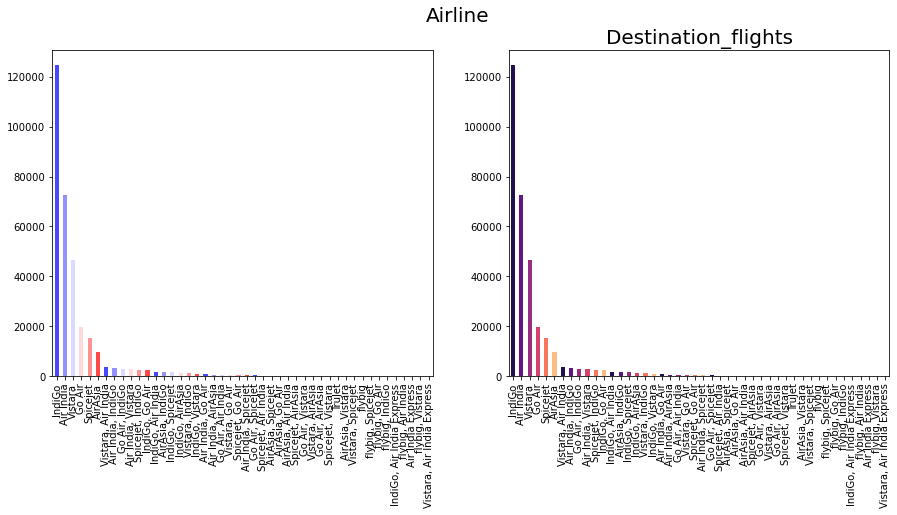

In [24]:
#Our new airline columns data look like
fig,ax=plt.subplots(1,2,figsize=(15,6))
air1=df["Airline"].value_counts()
air2=df["Airline"].value_counts()
air1.plot.bar(color=sns.color_palette("bwr"),ax=ax[0],label="Departure Flights")
air2.plot.bar(color=sns.color_palette("magma"),ax=ax[1])
plt.title("Destination_flights",fontsize=20)
plt.suptitle("Airline",fontsize=20)
plt.show()

In [27]:
class DataFrame_Info():
    def __init__(self):
        print("Attribute information")
    
    def Attribute_information(self,df):
        """
        This method give us the basic information of all the attributes like count of attributes,number of rows & columns,numerical attributes and categorical attributes and so on
        """
        
        data_info=pd.DataFrame(columns=['No of observation',
                                       'No of variables',
                                       'No of Numerical variables',
                                       'No of Factor variables',
                                       'No of Categorival variables',
                                       'No of Logical variables',
                                       'No of Date Variables',
                                       'No of zero variance variables'])
        
        data_info.loc[0,'No of observation']=df.shape[0]

        data_info.loc[0,'No of variables']=df.shape[1]
        
        data_info.loc[0,'No of Numerical variables']=df._get_numeric_data().shape[1]
        
        data_info.loc[0,'No of Factor variables']=df.select_dtypes(include='category').shape[1]
        
        data_info.loc[0,'No of Categorival variables']=df.select_dtypes(include='object').shape[1]
        
        data_info.loc[0,'No of Logical variables']=df.select_dtypes(include='bool').shape[1]
        
        data_info.loc[0,'No of Date Variables']=df.select_dtypes(include='datetime64').shape[1]
        
        data_info.loc[0,'No of zero variance variables']=df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]
        
        data_info=data_info.transpose()
        
        data_info.columns=['value']
        
        
        
        return data_info
    
    def __get_missing_values(self,data):
        
        """
        It is a private method ,so it cannot accesed by object outsid ethe class.This function will give us a basic information like count of missing values
        """
        
        #Getting sum of missing values for each feature
        missing_values=data.isnull().sum()
        #Feature missing values are ssorted from few to many
        missing_values.sort_values(ascending=False,inplace=True)
        #get the missing values
        return missing_values
    
    def Agg_Tabulation(self,data):
        """
        This method is a extension of additional inforamtion like about the data like Entrophy value,missing value percentage and some observations
        """
        
        print('='*100)
        print('Aggrgation of Table')
        
        table=pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1=pd.DataFrame(data.columns,columns=['Names'])
        table=table.reset_index()
        table=table.rename(columns={'index':'Name'})
        table['No of missing']=data.isnull().sum().values
        table['No of unique']=data.nunique().values
        table['Percent of missing']=((data.isnull().sum().values)/(data.shape[0]))*100
        table['First Observation']=data.loc[0].values
        table['Second observation']=data.loc[1].values
        table['Third Observation']=data.loc[2].values
        
    
        return table
        
        
        print('*'*100)
        print('Interquartile Range')
    def _iqr(self,x):
        """
        It is a private method return you a interquartile range
        """
            
        return x.quantile(q=0.75)-x.quantile(q=0.25)
        
    def __outlier_count(self,x):
        """
        It is a private method which return you a outliers present in a interquartile range
        """
        upper_out=x.quantile(q=0.75)+1.5 * self._iqr(x)
        lower_out=x.quantile(q=0.25)-1.5 * self._iqr(x)
            
        return len(x[x > upper_out])+len(x[x < lower_out])
    def num_count_summary(self,df):
        """
        This method which returns you basci information about Numerica variable like Positive values,Negitive Vlues,Unique Count,Zero count positive and negitive,infiniyt-count and count of outliers
        """
            
        df_num=df._get_numeric_data()
        data_info_num=pd.DataFrame()
        i=0
        for c in df_num.columns:
            data_info_num.loc[c,'Negitive values']=df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c,'Positive values']=df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c,'Zero values']=df_num[df_num[c]== 0].shape[0]
            data_info_num.loc[c,'Unique_count']=len(df_num[c].unique())
            data_info_num.loc[c,'Negitive_infinity_count']=df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive_infinity_count']=df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Percentage of miisning values']=df_num[df_num[c].isnull()].shape[0]/df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']=self.__outlier_count(df_num[c])
            i= i+1
        return data_info_num
    def statstical_summary(self,df):
        """
        This method which return you a various percentile of the data including count and mean
        """
        df_num=df._get_numeric_data()
        data_stat_num=pd.DataFrame()
            
        try:
            data_stat_num=pd.concat([df_num.describe().transpose(),
                                        pd.DataFrame(df_num.quantile(q=0.1)),
                                        pd.DataFrame(df_num.quantile(q=0.90)),
                                        pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns=['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass
        return data_stat_num

In [28]:
cat_data=df.select_dtypes(include="object")
cat_data.head()

,Airline,Cabin,Dept_city,Dept_month,arrival_city,layover_cities,Departure_Date,Arrival_Date,day_name,Dept_flights_time,arrival_flights_time
0,Vistara,PE,New Delhi,Apr,Mumbai,No Stops,20-04-2021 09:30,20-04-2021 11:40,Tuesday,Morning_flight,Afternoon_flight
1,Vistara,PE,New Delhi,Apr,Mumbai,No Stops,20-04-2021 15:30,20-04-2021 17:40,Tuesday,Afternoon_flight,Evening_flight
2,Vistara,PE,New Delhi,Apr,Mumbai,No Stops,20-04-2021 16:55,20-04-2021 19:05,Tuesday,Evening_flight,Evening_flight
3,Vistara,PE,New Delhi,Apr,Mumbai,No Stops,20-04-2021 12:45,20-04-2021 15:00,Tuesday,Afternoon_flight,Afternoon_flight
4,Vistara,PE,New Delhi,Apr,Mumbai,No Stops,20-04-2021 17:45,20-04-2021 20:05,Tuesday,Evening_flight,Evening_flight


In [29]:
columns_to_do_plot=cat_data[['Airline', 'Cabin', 'Dept_city', 'Dept_month', 'arrival_city','day_name','Dept_flights_time', 'arrival_flights_time']]

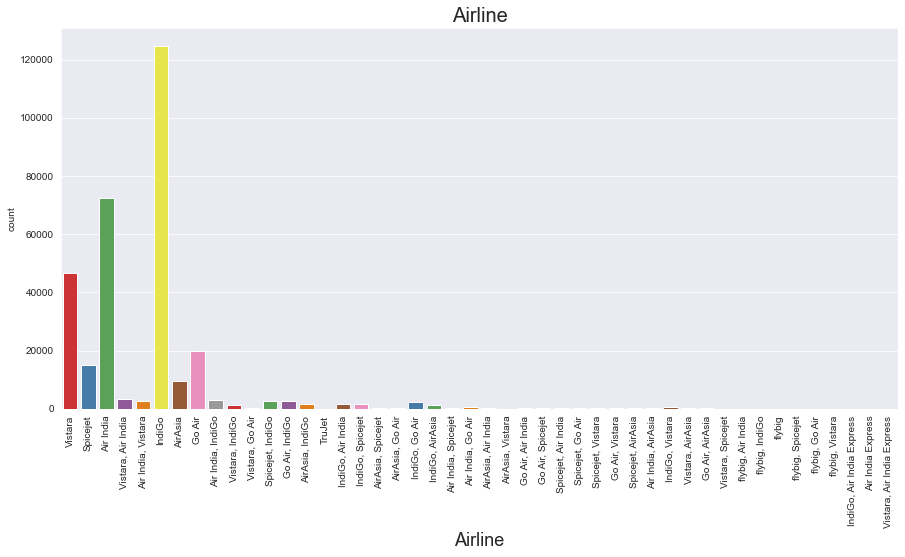

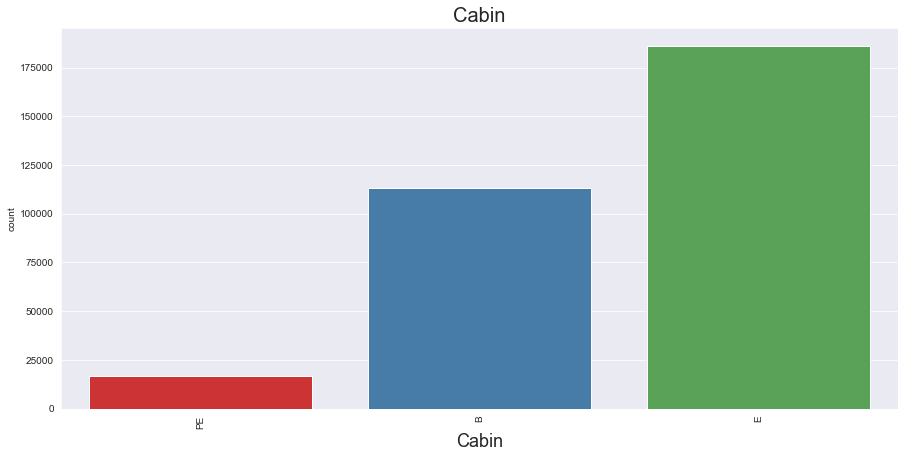

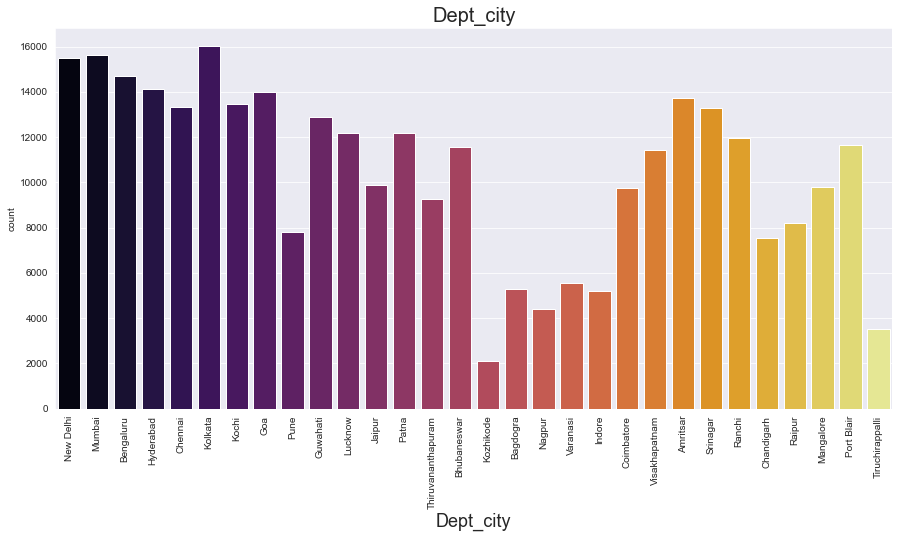

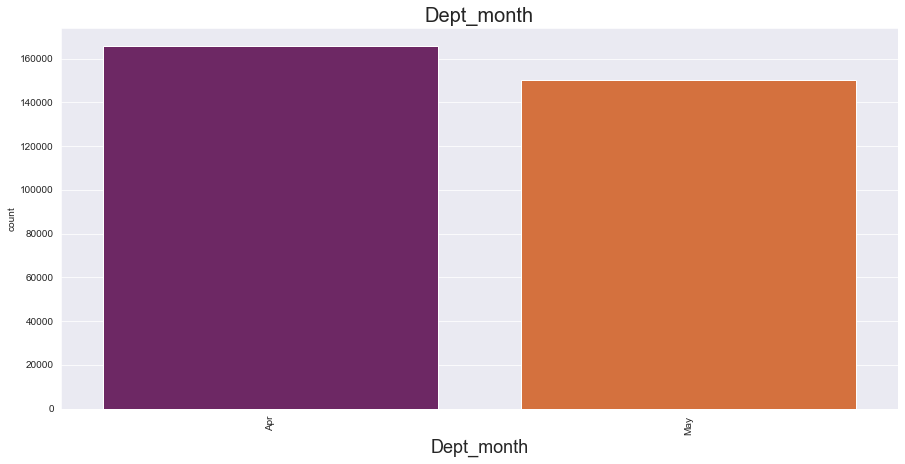

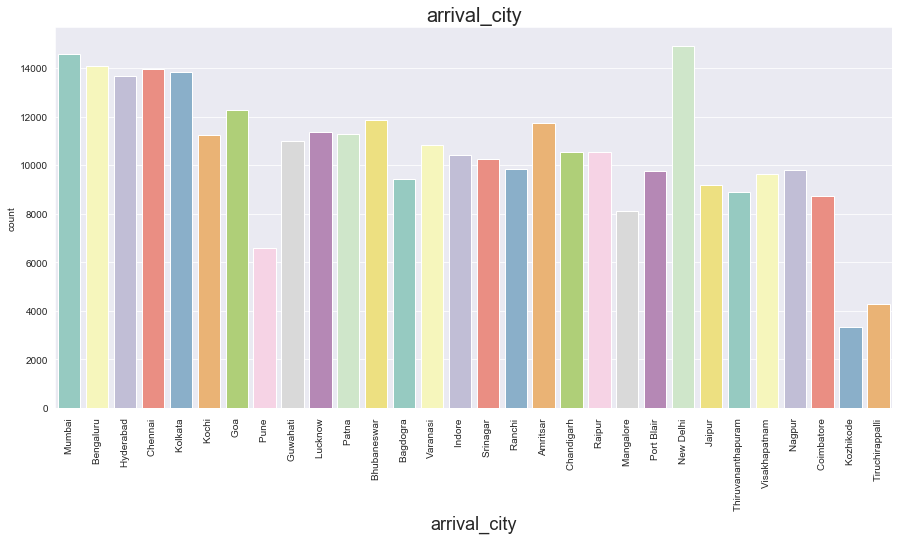

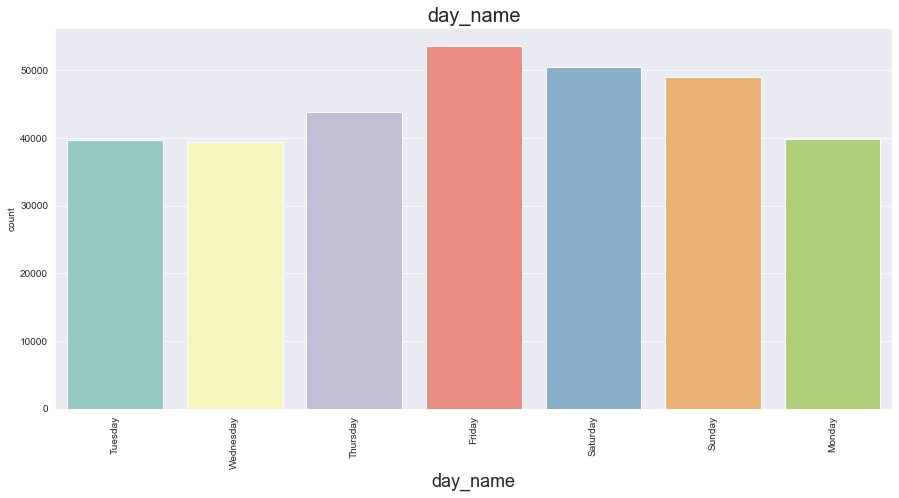

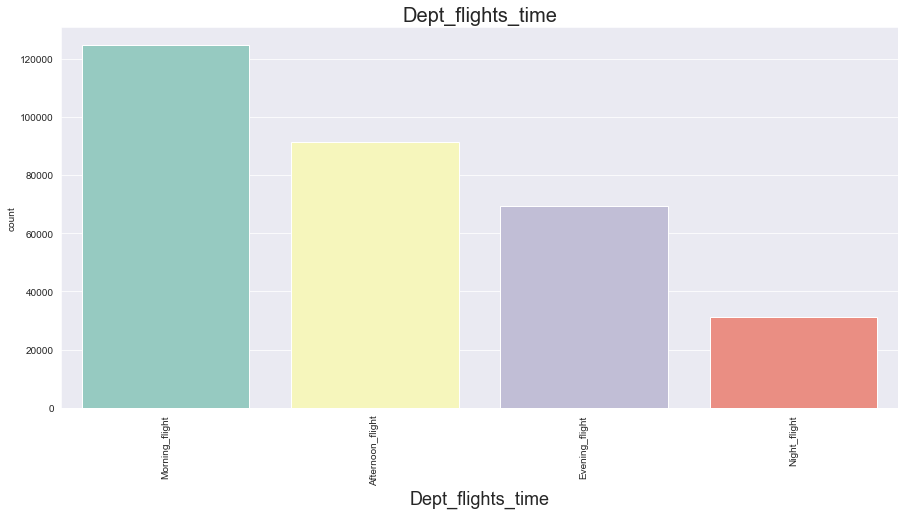

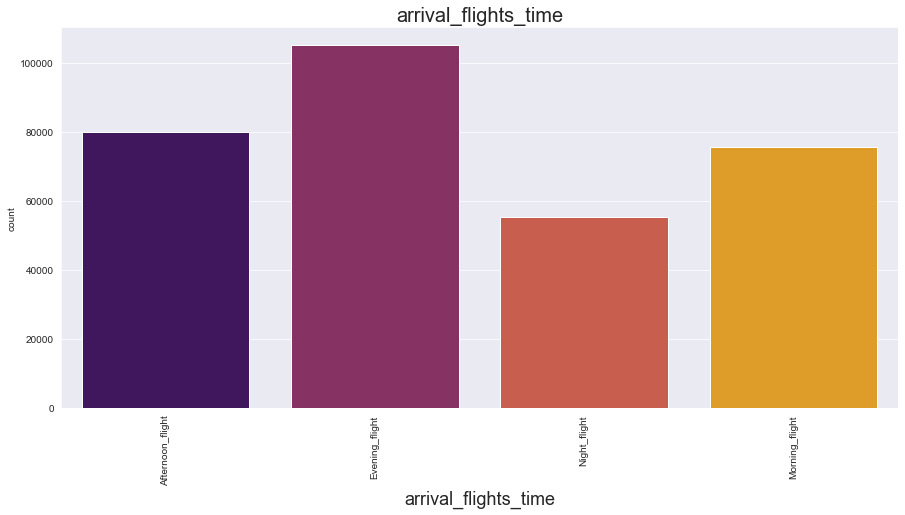

In [30]:
#Visualize the categories with the help of bar plot
import random
for i in columns_to_do_plot.columns:
  for j in random.choices(['summer','viridis','Set1','Set2','Set3','BuPu','inferno']):
    plt.figure(figsize=(15,7))
    sns.set_style('darkgrid')
    g=sns.countplot(x=i,data=cat_data,palette=j)
    g.set_xlabel(i,fontsize=18)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    g.set_title(i,fontsize=20)
    plt.show()

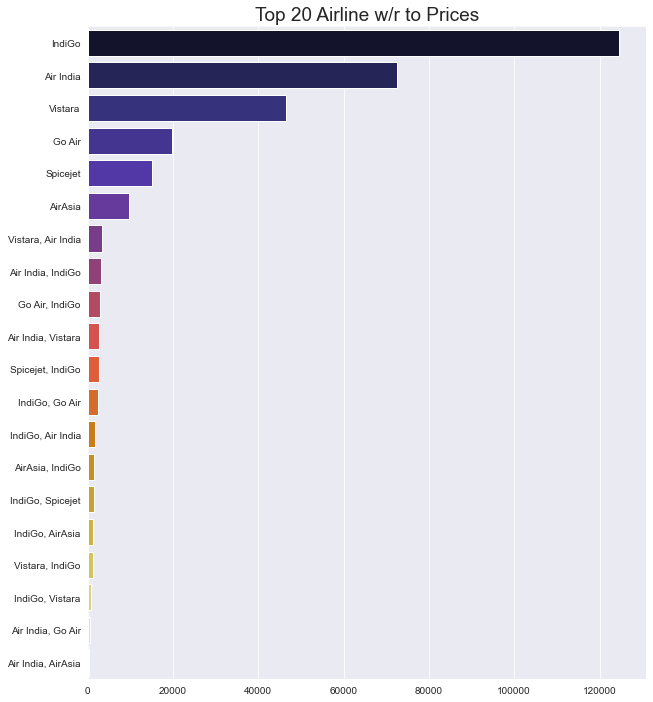

In [31]:
#Compare the each category in categorical column with the "Price columns" 
#Get the top 10 flights to compare with the Price column
top_20=df["Airline"].value_counts()[:20]
plt.figure(figsize=(10,12))
gv=sns.barplot(y=top_20.index,x=top_20.values,data=df,palette="CMRmap")
plt.title("Top 20 Airline w/r to Prices",fontsize=19)
plt.show()

In [32]:
def compare_with_tar(var,columns_to_do_plot,df):
  plt.style.use('fivethirtyeight')
  sns.catplot(x=var,y='Price',data=df,palette="viridis",aspect=2,height=5,kind='box')
  plt.title(var+"vs Price")
  plt.xticks(rotation=90)
  plt.show()

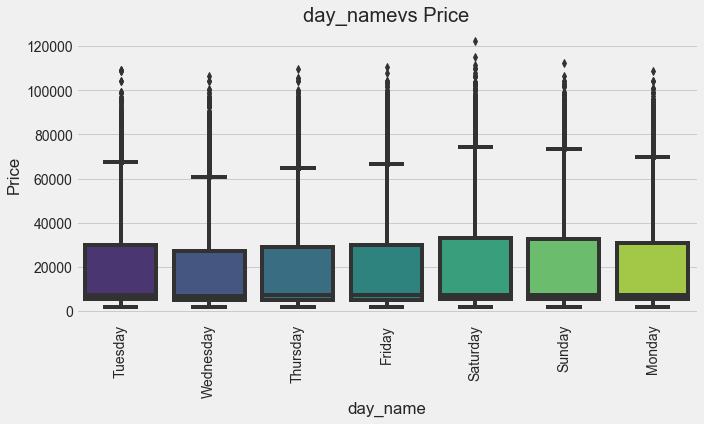

In [33]:
compare_with_tar("day_name",columns_to_do_plot,df)

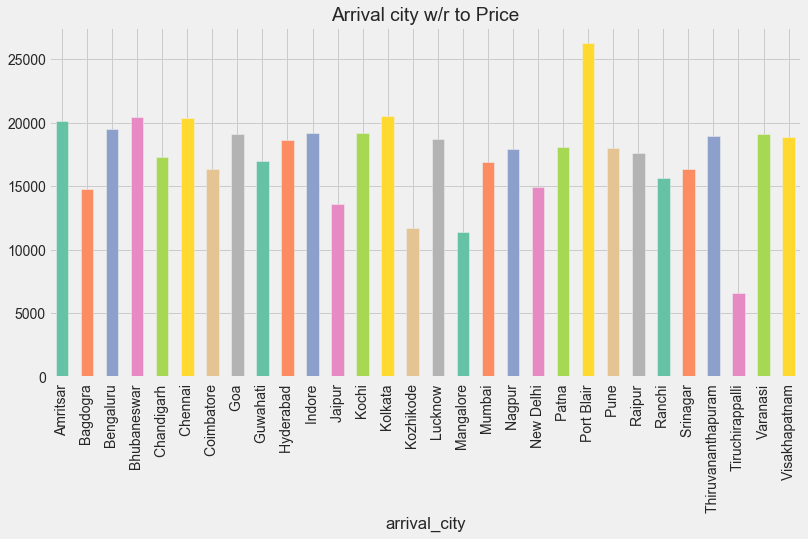

In [35]:
#Get the which arrival city highest and lowest flight price
arr=df.groupby("arrival_city")["Price"].mean()
arr.plot.bar(color=sns.color_palette("Set2",8),figsize=(12,6))
plt.title("Arrival city w/r to Price",fontsize=19)
plt.show()

In [39]:
#Our "Airline" data column has two categories such as departure flight and return flight so we need to take that those as two features instead of one variable
recent=pd.DataFrame(df['Airline'].apply(lambda x: x.split(',')).values.tolist(),columns=['Airline_1','Airline_2'])
recent_1=recent["Airline_1"]
recent_1
#Fill the null values with the another column such as "Airline_1"
fill_val=recent["Airline_2"].fillna(recent["Airline_1"])
#After handling null values in the airline column concatinate the airline column with the main dataframe
df_new=pd.concat([df,recent_1,fill_val],axis=1)
df_new.head()

,Price,Airline,Cabin,Dept_city,Dept_date,Dept_month,arrival_city,stops,layover_cities,Departure_Date,Arrival_Date,duration,weekday,day_name,dept_hours,arrival_hours,Dept_flights_time,arrival_flights_time,Airline_1,Airline_2
0,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 09:30,20-04-2021 11:40,130.0,1,Tuesday,9,11,Morning_flight,Afternoon_flight,Vistara,Vistara
1,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 15:30,20-04-2021 17:40,130.0,1,Tuesday,15,17,Afternoon_flight,Evening_flight,Vistara,Vistara
2,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 16:55,20-04-2021 19:05,130.0,1,Tuesday,16,19,Evening_flight,Evening_flight,Vistara,Vistara
3,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 12:45,20-04-2021 15:00,135.0,1,Tuesday,12,15,Afternoon_flight,Afternoon_flight,Vistara,Vistara
4,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 17:45,20-04-2021 20:05,140.0,1,Tuesday,17,20,Evening_flight,Evening_flight,Vistara,Vistara


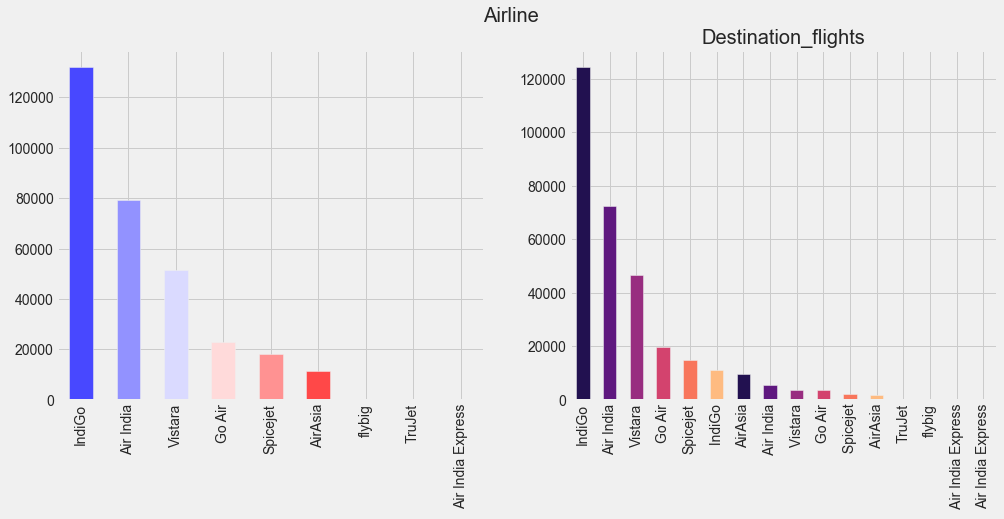

In [40]:

#Our new airline columns data look like
fig,ax=plt.subplots(1,2,figsize=(15,6))
air1=df_new["Airline_1"].value_counts()
air2=df_new["Airline_2"].value_counts()
air1.plot.bar(color=sns.color_palette("bwr"),ax=ax[0],label="Departure Flights")
air2.plot.bar(color=sns.color_palette("magma"),ax=ax[1])
plt.title("Destination_flights",fontsize=20)
plt.suptitle("Airline",fontsize=20)
plt.show()

In [41]:
#Replace the some values in the Airline_1 columns
df_new['Airline_1'].replace("Air India Express","Air India",inplace=True)

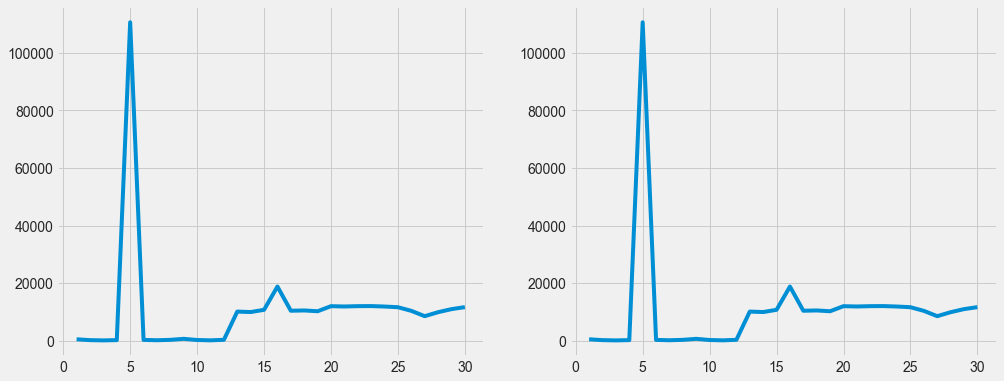

In [47]:
#Let's drop the some unwanted columns that doesn't require during model building
df_1=df_new.copy()
df_1.drop(labels=["Airline","Dept_date","layover_cities","Departure_Date","Arrival_Date"],axis=1,inplace=True)
fig,ax=plt.subplots(1,2,figsize=(15,6))
_gh=df_1['Day_of_Dep'].value_counts().sort_index(ascending=True)
_gh.plot(kind='line',ax=ax[0])
_gh_1=df_1['Day_of_Arr'].value_counts().sort_index(ascending=True)
_gh_1.plot(kind="line",ax=ax[1])

In [46]:
df_new.head()

,Price,Airline,Cabin,Dept_city,Dept_date,Dept_month,arrival_city,stops,layover_cities,Departure_Date,...,dept_hours,arrival_hours,Dept_flights_time,arrival_flights_time,Airline_1,Airline_2,Day_of_Dep,Month_of_Dep,Day_of_Arr,month_of_Arr
0,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 09:30,...,9,11,Morning_flight,Afternoon_flight,Vistara,Vistara,20,4,20,4
1,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 15:30,...,15,17,Afternoon_flight,Evening_flight,Vistara,Vistara,20,4,20,4
2,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 16:55,...,16,19,Evening_flight,Evening_flight,Vistara,Vistara,20,4,20,4
3,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 12:45,...,12,15,Afternoon_flight,Afternoon_flight,Vistara,Vistara,20,4,20,4
4,6159,Vistara,PE,New Delhi,20,Apr,Mumbai,0,No Stops,20-04-2021 17:45,...,17,20,Evening_flight,Evening_flight,Vistara,Vistara,20,4,20,4


In [44]:
#Extract the date and month from the date columns
df_new["Day_of_Dep"]=pd.to_datetime(df_new['Departure_Date']).dt.day
df_new["Month_of_Dep"]=pd.to_datetime(df_new["Departure_Date"]).dt.month
df_new["Day_of_Arr"]=pd.to_datetime(df_new["Arrival_Date"]).dt.day
df_new["month_of_Arr"]=pd.to_datetime(df_new["Arrival_Date"]).dt.month

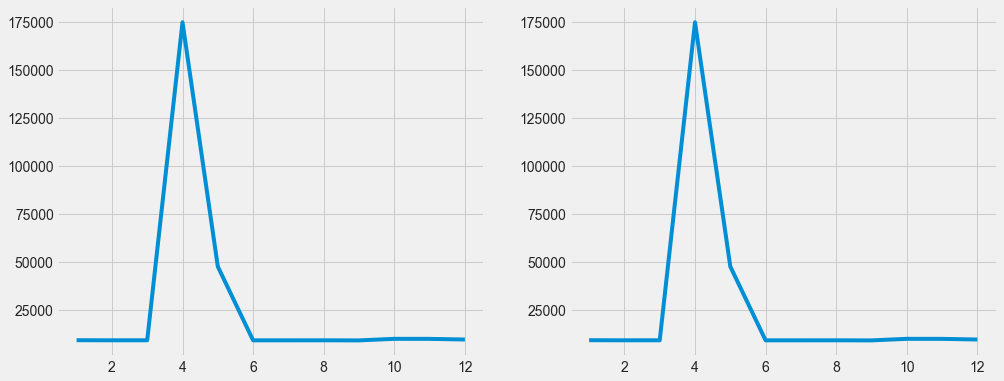

In [48]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
_lf=df_1['Month_of_Dep'].value_counts().sort_index(ascending=True)
_lf.plot(kind='line',ax=ax[0])
_lf_1=df_1['month_of_Arr'].value_counts().sort_index(ascending=True)
_lf_1.plot(kind="line",ax=ax[1])

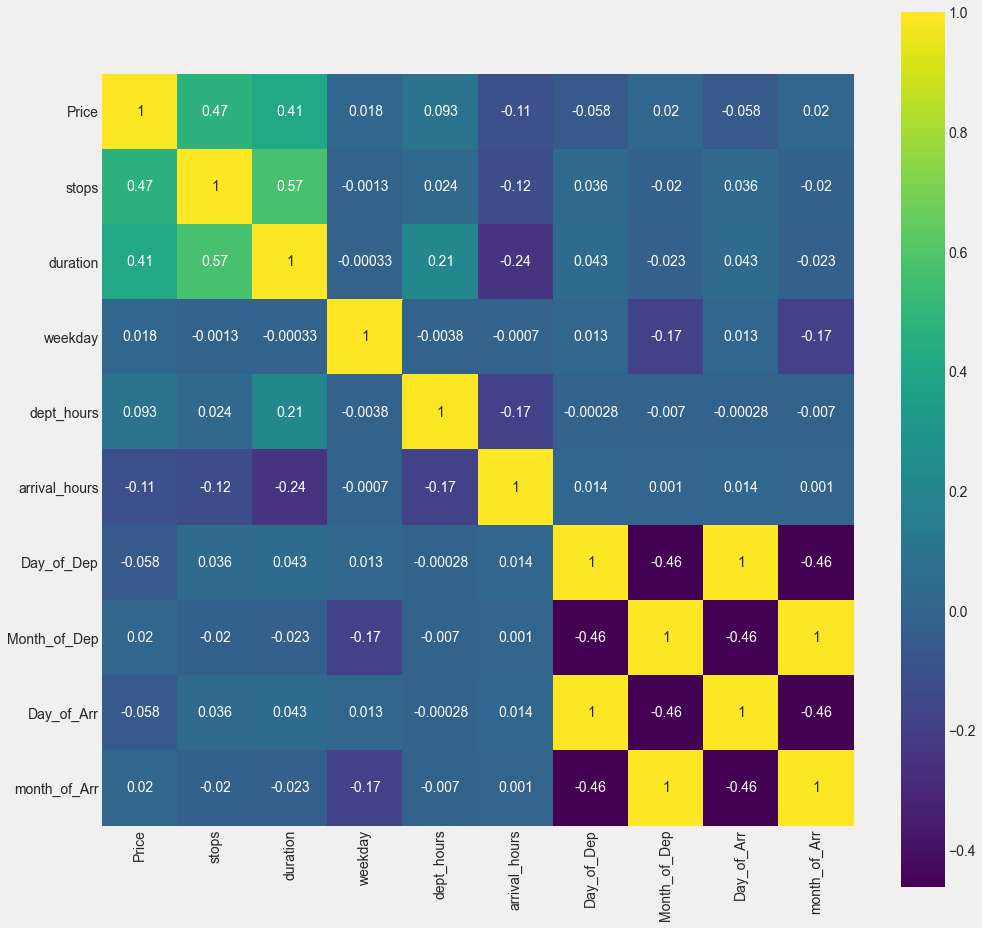

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(df_1.corr(),annot=True,cmap="viridis",square=True)
plt.show()